In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
# check for missing values
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
# we are updating the nan values of Age column with the average of all Ages i.e. 29.7
titanic['Age'] = titanic['Age'].fillna(29.7)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


#### Data is cleaned!!!

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(titanic.drop(columns=['Survived']),titanic['Survived'],test_size=0.2,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(criterion='entropy')

In [15]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
Y_pred =  model.predict(X_test)

In [17]:
Y_pred[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [18]:
Y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [19]:
model.score(X_train,Y_train)

0.9803370786516854

In [20]:
model.score(X_test,Y_test)

0.770949720670391

In [21]:
model.predict([[2.0, 1, 24.0, 0.0, 0.0, 15.0]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [22]:
from joblib import dump

In [23]:
dump(model,'Titanic_model.joblib')

['Titanic_model.joblib']

In [24]:
model.tree_.max_depth

23

In [25]:
from sklearn import tree

[Text(0.3483881578947368, 0.9791666666666666, 'x[1] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.17078947368421052, 0.9375, 'x[0] <= 2.5\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]'),
 Text(0.04421052631578947, 0.8958333333333334, 'x[2] <= 2.5\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]'),
 Text(0.016842105263157894, 0.8541666666666666, 'x[4] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008421052631578947, 0.8125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02526315789473684, 0.8125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07157894736842105, 0.8541666666666666, 'x[2] <= 27.5\nentropy = 0.201\nsamples = 128\nvalue = [4, 124]'),
 Text(0.042105263157894736, 0.8125, 'x[2] <= 23.5\nentropy = 0.342\nsamples = 47\nvalue = [3, 44]'),
 Text(0.03368421052631579, 0.7708333333333334, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.05052631578947368, 0.7708333333333334, 'x[2] <= 24.5\nentropy = 0.65\nsamples =

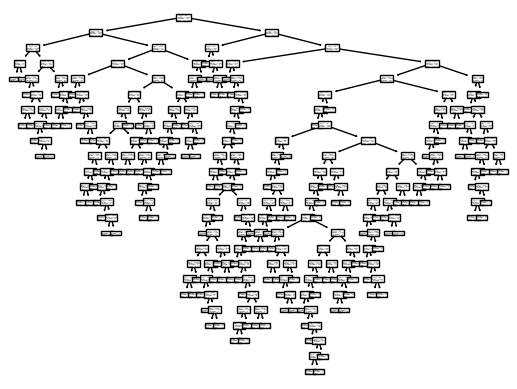

In [26]:
tree.plot_tree(model)

In [27]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [28]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [29]:
model.score(X_test,Y_test)

0.8212290502793296

In [30]:
model.score(X_train,Y_train)

0.8918539325842697

[Text(0.46383928571428573, 0.9444444444444444, 'x[1] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25357142857142856, 0.8333333333333334, 'x[0] <= 2.5\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]'),
 Text(0.075, 0.7222222222222222, 'x[2] <= 2.5\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]'),
 Text(0.02857142857142857, 0.6111111111111112, 'x[4] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.014285714285714285, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04285714285714286, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12142857142857143, 0.6111111111111112, 'x[2] <= 27.5\nentropy = 0.201\nsamples = 128\nvalue = [4, 124]'),
 Text(0.07142857142857142, 0.5, 'x[2] <= 23.5\nentropy = 0.342\nsamples = 47\nvalue = [3, 44]'),
 Text(0.05714285714285714, 0.3888888888888889, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.08571428571428572, 0.3888888888888889, 'x[2] <= 24.5\nentropy = 0.65\nsamples = 18\nvalue =

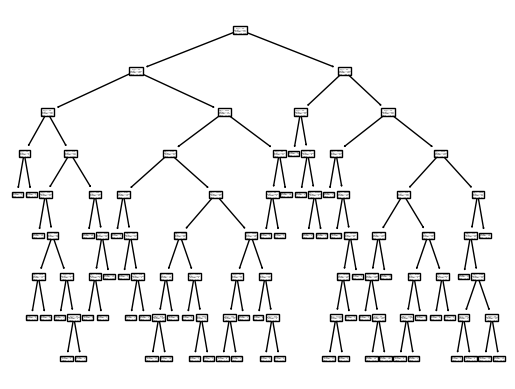

In [31]:
tree.plot_tree(model)

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=1000,max_depth=11)

In [34]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=11, n_estimators=1000)

In [35]:
rfc.score(X_test,Y_test)

0.8100558659217877

In [36]:
rfc.score(X_train,Y_train)

0.9466292134831461

In [37]:
rfc.estimators_[:5]

[DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=1369280452),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=1962455549),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=719070435),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=628302442),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=1677409664)]

## Boosting Code

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbdt = GradientBoostingClassifier(n_estimators=300)

In [40]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=300)

In [41]:
gbdt.score(X_test,Y_test)

0.8268156424581006

In [42]:
gbdt.score(X_train,Y_train)

0.9424157303370787